In [146]:
def preprocess_image(image):
    # Correct nonuniform illumination of the background
    se = cv2.getStructuringElement(cv2.MORPH_RECT, (8, 8))
    bg = cv2.morphologyEx(image, cv2.MORPH_DILATE, se)
    corrected_image = cv2.divide(image, bg, scale=255)

    # Enhance contrast using CLAHE (Contrast Limited Adaptive Histogram Equalization)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    contrast_enhanced_image = clahe.apply(corrected_image)

    # Binarization
    _, binary_image = cv2.threshold(contrast_enhanced_image, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

    # Noise removal using median blur
    denoised_image = cv2.medianBlur(binary_image, 5)

    # Further noise removal using morphological operations
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    
    # Apply morphological opening (erosion followed by dilation)
    opened_image = cv2.morphologyEx(denoised_image, cv2.MORPH_OPEN, kernel)
    
    # Apply morphological closing (dilation followed by erosion)
    final_image = cv2.morphologyEx(opened_image, cv2.MORPH_CLOSE, kernel)

    return final_image

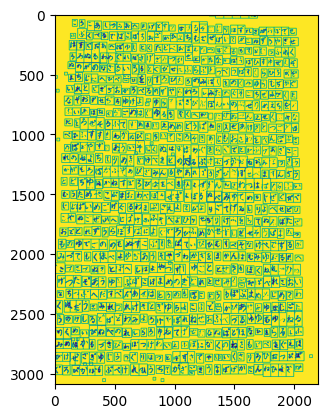

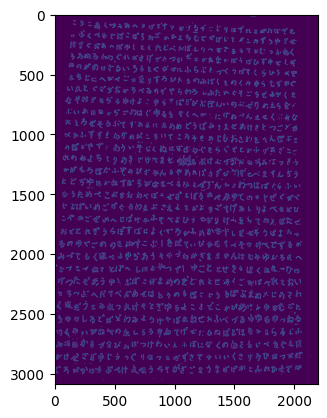

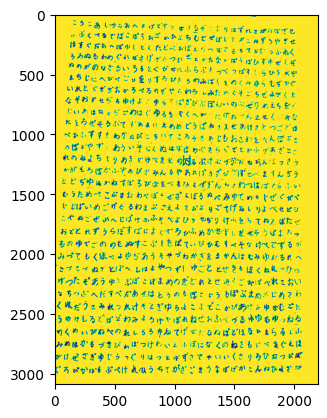

In [187]:
import cv2
from matplotlib import pyplot as plt
%matplotlib inline


# image = cv2.imread('test.jpg')
image=cv2.imread('test/test2.jpg', cv2.IMREAD_GRAYSCALE)
gray= cv2.resize(image, (0,0), fx=2, fy=2) 

# image=preprocess_image(image)[10:-10,10:-10]
# plt.imshow(image)
# plt.show()
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
original=gray.copy()
_,gray = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
blur = cv2.GaussianBlur(gray, (3,3), 0)
canny = cv2.Canny(blur, 120, 255, 1)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (6,6))
dilate = cv2.dilate(canny, kernel, iterations=4)
cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

# min_area = 5000
image_number = 0
avg_h=0
for c in cnts:
    avg_h+=cv2.boundingRect(c)[3]
avg_h//=len(cnts)

boxes=[]

for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    # cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 2)
    if w>1.2*avg_h:
        #search toward right
        ratio=w//avg_h+1
        inc=w//ratio
        for n in range(ratio):
            cv2.rectangle(gray, (x, y), (x + (n+1)*inc, y + h), (36,255,12), 2)
            boxes.append(((y,n*inc+x),(h,inc)))
    else:
        cv2.rectangle(gray, (x, y), (x + w, y + h), (36,255,12), 2)
        boxes.append(((y,x),(h,w)))


plt.imshow(gray)
plt.show()
cv2.imwrite('char/out2.png', gray)
plt.imshow(canny)
plt.show()

plt.imshow(blur)
plt.show()

In [189]:
threshold=avg_h/2
boxes=sorted(boxes)

page=[]
line=[]
prev_y=boxes[0][0][0]

for (y,x),(h,w) in boxes:
    if y-prev_y<threshold and len(line)<31:
        line.append(((x,y),(w,h)))
    else:
        line=sorted(line)
        # print(len(line))
        page.append(line)
        line=[((x,y),(w,h))]
    prev_y=y
line=sorted(line)
page.append(line)

In [190]:
if K.image_data_format() == "channels_first":
  shape=(1,1,48,48) #first dimension is the length of vector
else:
  shape=(1, 48, 48, 1)

In [191]:
import os
unicode_to_class={}
class_to_unicode={}
unicodes=["3042", "3044", "3046", "3048", "304a", "304b", "304c", "304d", "304e", "304f", "3050", "3051", "3052", "3053", "3054", "3055", "3056", "3057", "3058", "3059", "305a", "305b", "305c", "305d", "305e", "305f", "3060", "3061", "3062", "3064", "3065", "3066", "3067", "3068", "3069", "306a", "306b", "306c", "306d", "306e", "306f", "3070", "3071", "3072", "3073", "3074", "3075", "3076", "3077", "3078", "3079", "307a", "307b", "307c", "307d", "307e", "307f", "3080", "3081", "3082", "3084", "3086", "3088", "3089", "308a", "308b", "308c", "308d", "308f", "3092", "3093"]
count=0
for u in unicodes:
    hex="0x"+u
    unicode_to_class[hex]=count
    class_to_unicode[count]=hex
    count+=1
print(class_to_unicode)

{0: '0x3042', 1: '0x3044', 2: '0x3046', 3: '0x3048', 4: '0x304a', 5: '0x304b', 6: '0x304c', 7: '0x304d', 8: '0x304e', 9: '0x304f', 10: '0x3050', 11: '0x3051', 12: '0x3052', 13: '0x3053', 14: '0x3054', 15: '0x3055', 16: '0x3056', 17: '0x3057', 18: '0x3058', 19: '0x3059', 20: '0x305a', 21: '0x305b', 22: '0x305c', 23: '0x305d', 24: '0x305e', 25: '0x305f', 26: '0x3060', 27: '0x3061', 28: '0x3062', 29: '0x3064', 30: '0x3065', 31: '0x3066', 32: '0x3067', 33: '0x3068', 34: '0x3069', 35: '0x306a', 36: '0x306b', 37: '0x306c', 38: '0x306d', 39: '0x306e', 40: '0x306f', 41: '0x3070', 42: '0x3071', 43: '0x3072', 44: '0x3073', 45: '0x3074', 46: '0x3075', 47: '0x3076', 48: '0x3077', 49: '0x3078', 50: '0x3079', 51: '0x307a', 52: '0x307b', 53: '0x307c', 54: '0x307d', 55: '0x307e', 56: '0x307f', 57: '0x3080', 58: '0x3081', 59: '0x3082', 60: '0x3084', 61: '0x3086', 62: '0x3088', 63: '0x3089', 64: '0x308a', 65: '0x308b', 66: '0x308c', 67: '0x308d', 68: '0x308f', 69: '0x3092', 70: '0x3093'}


In [192]:
import numpy as np

f = open('cnn_predict2.txt', "w", encoding='utf-8')
for line in page:
    for (x,y),(w,h) in line:
        char=original[y:y+h,x:x+w]
        #pad to square
        rows,cols = char.shape
        compl_dif = abs(rows-cols)
        half_Sm = compl_dif//2
        half_Big = half_Sm if half_Sm*2 == compl_dif else half_Sm+1
        if rows > cols:
            char = np.pad(char,((0,0),(half_Sm,half_Big)),'constant', constant_values=255)
        else:
            char = np.pad(char,((half_Sm,half_Big),(0,0)),'constant', constant_values=255)
        char = cv2.resize(char, (48, 48)).reshape(shape)
        char=char/255
        probs = reconstructed_model.predict(char)
        pred=np.argmax(probs, axis=-1)[0]
        f.write(chr(int(class_to_unicode[pred],16)))
f.close() 
    

1/1 [==============================] - 0s 12ms/step
